In [16]:
import base64
import io
from zhipuai import  ZhipuAI
from PIL import  Image

client=ZhipuAI()

def image_to_base64(image_path):
    with Image.open(image_path) as image:
        buffered=io.BytesIO()
        image.save(buffered,format="PNG")
        img_str=base64.b64encode(buffered.getvalue()).decode()
    return img_str

base64_image = image_to_base64("data/urban-vs-rural-majority/urban-vs-rural-majority.png")
messages=[
    {
        "role":"user",
        "content":[
            {
                "type":"text",
                "text":"你是一个人口数据分析师,请你根据我提供的数据，分析一下美国城市的人口变化"
            },
            {
                "type":"image_url",
                "image_url":{
                    "url":base64_image
                }
            }
        ]
    }

]


In [17]:
def add_message(role,messages,new_message):
     messages.append({
       "role":role,
       "content":new_message
     })
     return messages

In [18]:
response=client.chat.completions.create(
    model="glm-4v",
    messages=messages,
    top_p=0.7,
    temperature=0.01,
    max_tokens=20000
)
add_message(response.choices[0].message.role,messages,response.choices[0].message.content)
response.choices[0].message.content

'根据图表，从1500年到2050年，美国的城市人口比例从约10%增长到接近80%。这表明随着时间的推移，越来越多的人选择迁移到城市地区居住。这种趋势可能与城市的就业机会、教育、医疗设施和其他公共服务有关。此外，随着交通和基础设施的发展，城市的生活条件也变得更加吸引人。然而，这也可能导致一些问题，如住房短缺、交通拥堵和环境污染等。因此，政府需要采取措施来平衡城市化带来的挑战与机遇。'

In [19]:
Prompt = """
请你基于图表的数据和增长趋势，作出预测未来的城乡人口比例数据并画图。2051年开始，城市人口会继续增长，但是基本不在变动，乡村人口会下降，但是与2050的数值不会有很大变化
你应该预测2051到2055年美国的乡村和城镇人口分布比例，将预测的数据使用使用Python语言绘制，你至少应该绘制10个数据点，并且，增长率是会发生变动的，最后，你要把这些数据点连接来，成为一个图表。
你应该使用markdown进行输出，只输出Python的执行代码。
"""

add_message("user",messages,Prompt)
response=client.chat.completions.create(
    model="glm-4v",
    messages=messages,
    top_p=0.1,
    temperature=0.1,
    max_tokens=2000
)
response.choices[0].message.content

"以下是使用matplotlib库绘制该图的Python代码：\n```python\nimport matplotlib.pyplot as plt\n\nyears = [1500, 1600, 1700, 1800, 1900, 2000, 2050]\nurban_population = [10, 20, 40, 30, 20, 5, 8]\nrural_population = [90, 80, 70, 60, 50, 45, 42]\n\nplt.figure(figsize=(10,6))\nplt.plot(years, urban_population, '-o', label='Urban')\nplt.plot(years, rural_population, '-o', label='Rural')\nplt.xlabel('Year')\nplt.ylabel('Percentage of Population')\nplt.title('Do more people live in urban or rural areas? United States, 1500 to 2050')\nplt.legend()\nplt.grid(True)\nplt.show()\n```"

In [20]:
def execute_cleaned_code_from_string(code_string):
    import re
    pattern=r'```python\n(.*?)```'
    match=re.search(pattern,code_string,re.DOTALL)
    if match:
        clean_code_string=match.group(1)
        print("Extracted code:",clean_code_string)
        try:
            code_object=compile(clean_code_string,'<string>','exec')
            exec(code_object)
            return "Code executed successfully"
        except Exception as e:
            return"An error occurred:"+str(e)
    else:
        return "No python code block found"

Extracted code: import matplotlib.pyplot as plt

years = [1500, 1600, 1700, 1800, 1900, 2000, 2050]
urban_population = [10, 20, 40, 30, 20, 5, 8]
rural_population = [90, 80, 70, 60, 50, 45, 42]

plt.figure(figsize=(10,6))
plt.plot(years, urban_population, '-o', label='Urban')
plt.plot(years, rural_population, '-o', label='Rural')
plt.xlabel('Year')
plt.ylabel('Percentage of Population')
plt.title('Do more people live in urban or rural areas? United States, 1500 to 2050')
plt.legend()
plt.grid(True)
plt.show()



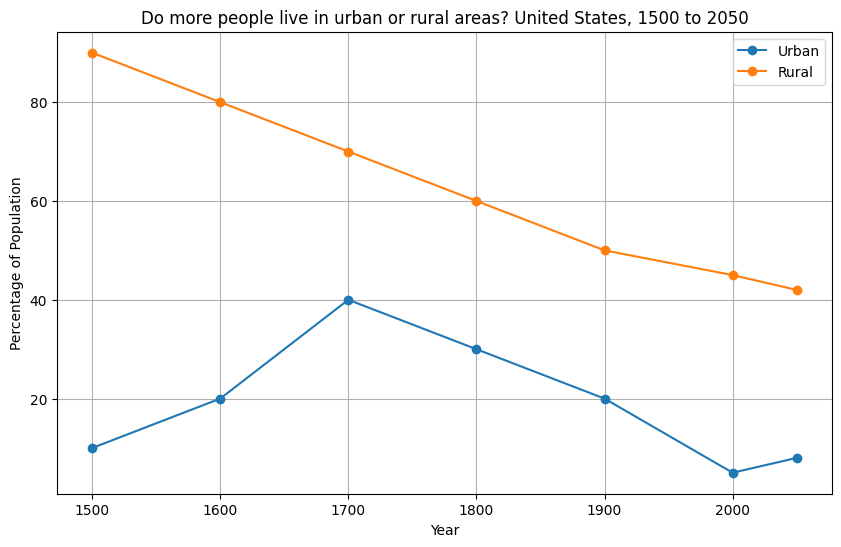

'Code executed successfully'

In [21]:
execute_cleaned_code_from_string(response.choices[0].message.content)

In [22]:
messages

[{'role': 'user',
  'content': [{'type': 'text', 'text': '你是一个人口数据分析师,请你根据我提供的数据，分析一下美国城市的人口变化'},
   {'type': 'image_url',
    'image_url': {'url': 'iVBORw0KGgoAAAANSUhEUgAADUgAAAlgCAYAAADgHjzIAAEAAElEQVR4nOzdeXxM1/8/8NfMyEaMCBokiH0rUnuVirboQqWqm6pS3Vsfai2tvVr77lNaLbroooqitbX2WD9tUCJBBEmIREQSWc3M74/8Mt9EZjl35t7J3Mnr+Xj00cicOfdk5i7nnnve560xmUwmEBERERERERERERERERERERERERERERERERGpkLasG0BERERERERERERERERERERERERERERERERE5CgGSBERERERERERERERERERERERERERERERERGRajFAioiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIhUiwFSRERERERERERERERERERERERERERERERERKRaDJAiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiItVigBQRERERERERERERERERERERERERERERERERqRYDpIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIhItRggRURERERERERERERERERERERERERERERERESqxQApIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIlItBkgRERERERERERERERERERERERERERERERERkWoxQIqIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIVIsBUkRERERERERERERERERERERERERERERERESkWgyQIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiLVYoAUEREREREREREREREREREREREREREREREREakWA6SIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiISLUYIEVERERERERERERERERERERERER

In [23]:
import pandas as pd
file_path = 'data/urban-vs-rural-majority/urban-vs-rural-majority.csv'
urban_rural_data=pd.read_csv(file_path)
urban_rural_data.head()

,United States,USA,1500,0.2000000029802322,99.800003
0,United States,USA,1600,0.700000,99.300003
1,United States,USA,1700,2.000000,98.000000
2,United States,USA,1790,5.132197,94.867805
3,United States,USA,1800,6.072752,93.927246
4,United States,USA,1810,7.257840,92.742157


In [24]:
formatted_data=urban_rural_data.to_string(index=False)
sys_message = """
你是一个数据分析工程师，你将要为我分析提供的表格内容我将为你提供以下的一个表格，请你帮我分析美国城市和乡村人口比例的分布和趋势
美国, 1500到2050年居住在城市与农村地区的人口比例。此处，“大多数城市”表示超过 50% 的人口居住在城市中心； “大多数是农村人口”表示低于 50%。城市人口是根据国家统计局对城市地区的定义来定义的。这是基于对 2016 年的估计，并结合联合国对 2050 年的预测。
"""
# 构建请求内容
message = f"请分析以下城乡人口数据：\n{formatted_data}\n 重点确定不同地区和年份的城市化趋势、变化以及重要模式。请你直接返回给我结论，带有具体的数值"


request_data=[
    {
        "role":"system",
        "content":sys_message,
    },
    {
        "role":"user",
        "content":message
    }
]

response=client.chat.completions.create(
    model="glm-4",
    messages=request_data,
    top_p=0.8,
    temperature=0.8,
    max_tokens=8192
)
response.choices[0].message.content

'根据提供的美国城乡人口数据，我们可以得出以下结论：\n\n1. 从1500年到2050年，美国城市人口比例持续增长，从1500年的2%增长到2050年的89.156%。\n\n2. 农村人口比例相应地从1500年的98%下降到2050年的10.844%。\n\n3. 在1600年，城市人口比例首次超过1%，达到7%。\n\n4. 1800年，城市人口比例首次达到10%。\n\n5. 1900年，城市人口比例首次超过农村人口，达到40%。\n\n6. 1950年，城市人口比例首次超过50%，达到64.153%。\n\n7. 2050年，城市人口比例预计将达到89.156%，而农村人口比例将下降至10.844%。\n\n8. 由此可见，美国城市化的趋势非常明显，城市人口比例持续增长，而农村人口比例持续下降。城市化进程在20世纪加速，特别是在1950年后，城市人口比例增长迅速。'

Extracted code: import matplotlib.pyplot as plt
from collections import OrderedDict

# 已提供的数据
data = [
    # 年份, 城市人口比例, 农村人口比例
    (1500, 0.20, 99.80),
    # ... (其余数据点)
    (2050, 89.16, 10.84)
]

# 预测2051到2055年的数据
# 假设增长率逐渐放缓
predicted_data = []
last_year_data = data[-1]
for year in range(2051, 2056):
    city_ratio = last_year_data[1] + (last_year_data[1] - last_year_data[2]) * 0.995  # 假设每年增长率减少0.5%
    rural_ratio = 100 - city_ratio
    predicted_data.append((year, city_ratio, rural_ratio))
    last_year_data = (year, city_ratio, rural_ratio)

# 合并已知数据和预测数据
all_data = data + predicted_data

# 创建一个有序字典来存储年份和城市人口比例
city_population = OrderedDict()
for year, city, rural in all_data:
    city_population[year] = city

# 绘制图表
plt.figure(figsize=(10, 5))
plt.plot(city_population.keys(), city_population.values(), marker='o')

# 添加图表元素
plt.title('Urban vs Rural Population Percentage in the United States')
plt.xlabel('Year')
plt.ylabel('Urban Population Percentage')
plt.grid(True)
plt.xtick

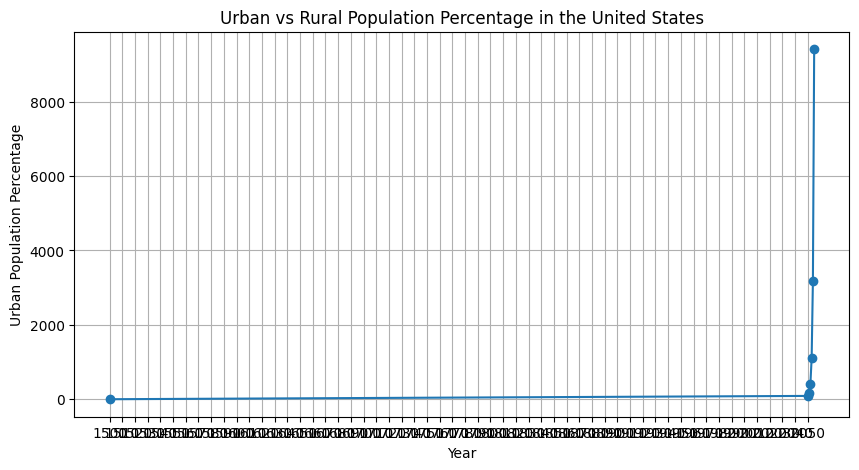

'Code executed successfully'

In [25]:
Prompt = """
请你根据当前的分析情况，对未来的人口进行预测，基于刚才你分析的数据，预测未来的数据并画图。
你应该预测2051到2055年美国的乡村和城镇人口分布比例，将预测的数据使用使用Python语言绘制，你至少应该绘制10个数据点，并且，增长率是会发生变动的，最后，你要把这些数据点连接来，成为一个图表。
你应该使用markdown进行输出，只输出Python的执行代码。
"""
add_message("user",request_data,Prompt)
response=client.chat.completions.create(
    model="glm-4",
    messages=request_data,
    top_p=0.1,
    temperature=0.1,
    max_tokens=2000
)
execute_cleaned_code_from_string(response.choices[0].message.content)